<a href="https://colab.research.google.com/github/dn-bit/time-series-uisng-prophet/blob/main/using_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import prophet



In [5]:
df=pd.read_csv("AirPassengers.csv")

In [6]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [9]:
df.tail()

,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [14]:
#make model on prophet

from prophet import Prophet

model=Prophet()

In [15]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbuzu9px8/65u1c2hc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbuzu9px8/laxha8c8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44229', 'data', 'file=/tmp/tmpbuzu9px8/65u1c2hc.json', 'init=/tmp/tmpbuzu9px8/laxha8c8.json', 'output', 'file=/tmp/tmpbuzu9px8/prophet_modelik72z6rl/prophet_model-20230503084120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:41:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:41:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [19]:
#make future date

model_future=model.make_future_dataframe(periods=365)

model_future.head(20)

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
5,1949-06-01
6,1949-07-01
7,1949-08-01
8,1949-09-01
9,1949-10-01


In [21]:
prediction=model.predict(model_future)

prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
504,1961-11-27,520.934753,469.218331,527.662012,520.376289,521.488238,-21.361219,-21.361219,-21.361219,-21.361219,-21.361219,-21.361219,0.0,0.0,0.0,499.573534
505,1961-11-28,521.035587,468.689444,525.539147,520.476515,521.591897,-23.063456,-23.063456,-23.063456,-23.063456,-23.063456,-23.063456,0.0,0.0,0.0,497.972130
506,1961-11-29,521.136420,467.375925,523.464464,520.575509,521.695557,-25.486988,-25.486988,-25.486988,-25.486988,-25.486988,-25.486988,0.0,0.0,0.0,495.649432
507,1961-11-30,521.237254,464.368638,522.002992,520.672612,521.798438,-28.590291,-28.590291,-28.590291,-28.590291,-28.590291,-28.590291,0.0,0.0,0.0,492.646963
508,1961-12-01,521.338087,460.305143,517.283359,520.770966,521.901003,-32.314118,-32.314118,-32.314118,-32.314118,-32.314118,-32.314118,0.0,0.0,0.0,489.023969


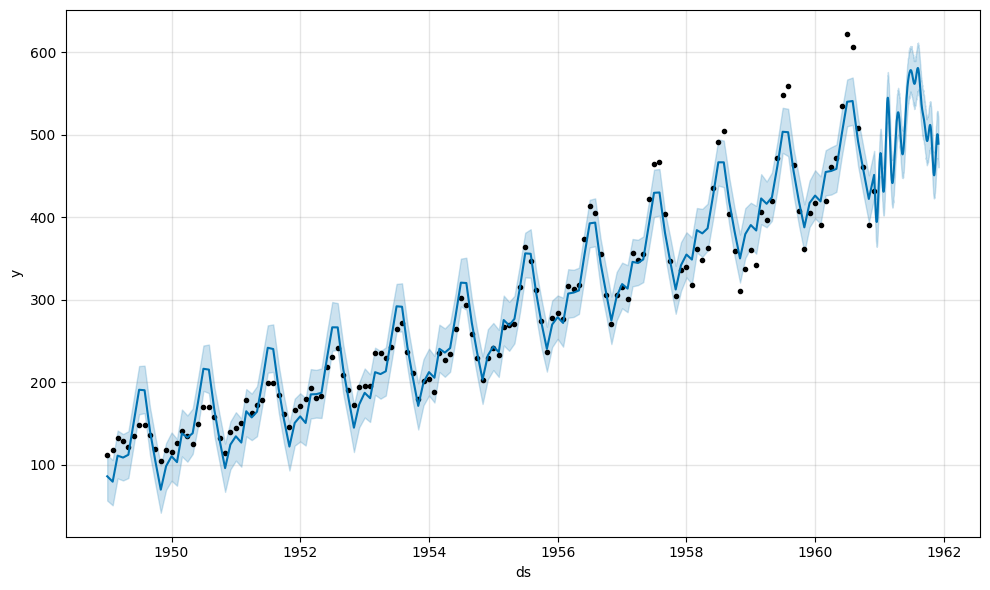

In [24]:
model.plot(prediction)
plt.show()

In [26]:
#cross validation

from prophet.diagnostics import cross_validation

df_cv=cross_validation(model,initial='730 days',period='180 days',horizon='365 days')
df_cv.head()

INFO:prophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbuzu9px8/2f70ynfe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbuzu9px8/kzo5fcug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20740', 'data', 'file=/tmp/tmpbuzu9px8/2f70ynfe.json', 'init=/tmp/tmpbuzu9px8/kzo5fcug.json', 'output', 'file=/tmp/tmpbuzu9px8/prophet_modelibnurg40/prophet_model-20230503090358.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:03:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:04:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbuzu9px8/k78n5363.json
DEBUG:cmdstanpy:input tempfi

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,156.242814,155.913728,156.554710,150,1951-01-18
1,1951-03-01,168.317463,167.206020,169.342447,178,1951-01-18
2,1951-04-01,155.956061,153.953619,157.909539,163,1951-01-18
3,1951-05-01,141.944765,138.861231,144.934040,172,1951-01-18
4,1951-06-01,177.539724,173.274429,181.649583,178,1951-01-18


In [27]:
from prophet.diagnostics import performance_metrics

df_per=performance_metrics(df_cv)
df_per

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1085.768665,32.951004,25.783302,0.077941,0.074049,0.079012,0.227273
1,42 days,1013.669727,31.838180,25.266511,0.077006,0.074049,0.077762,0.181818
2,46 days,909.273248,30.154158,24.712391,0.079027,0.080958,0.078828,0.136364
3,47 days,1045.369112,32.332168,26.931964,0.082496,0.085523,0.082672,0.136364
4,48 days,1034.782704,32.168039,26.377217,0.080566,0.085523,0.080809,0.181818
...,...,...,...,...,...,...,...,...
165,359 days,758.199192,27.535417,21.460603,0.067831,0.060426,0.067530,0.386364
166,360 days,761.734625,27.599540,21.743248,0.068702,0.060426,0.068418,0.363636
167,362 days,854.999808,29.240380,23.000731,0.067769,0.060426,0.067990,0.363636
168,364 days,828.216058,28.778743,21.924026,0.064832,0.050004,0.065151,0.363636


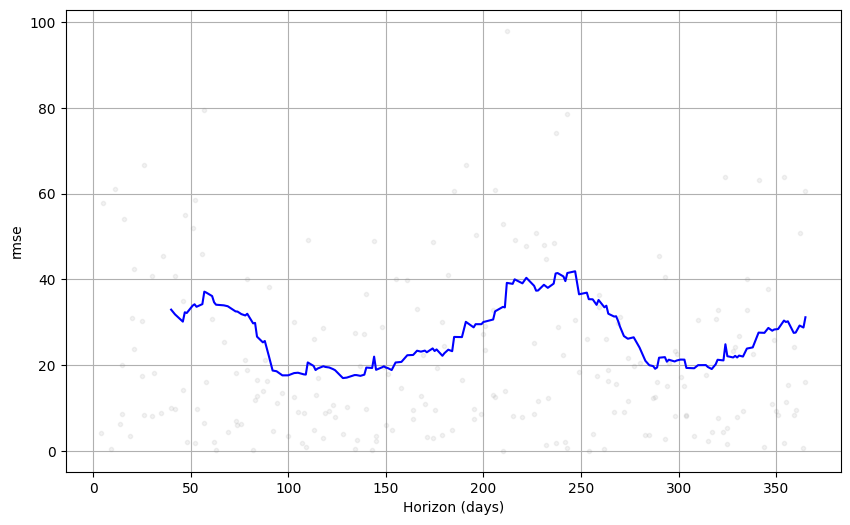

In [28]:
from prophet.plot import plot_cross_validation_metric

plott=plot_cross_validation_metric(df_cv,metric='rmse')